### Initialisation

In [0]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
df = pd.read_csv('/content/gdrive/My Drive/NLP/Womens Clothing E-Commerce Reviews.csv')

In [0]:
df = df[df.Rating != 3] # We drop 3 as 3 is ambigious to predict

In [0]:
for column in ["Division Name","Department Name","Class Name","Review Text"]:
    df = df[df[column].notnull()]
df.drop(df.columns[0], inplace=True, axis=1)

In [7]:
df.shape

(19805, 10)

In [0]:
df['Label'] = 0

In [0]:
df.loc[df.Rating >= 4, ['Label']] = 1

In [0]:
df['Word Count'] = df['Review Text'].str.split().apply(len)

In [11]:
df.sample(3)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Label,Word Count
17652,1131,61,Cute and fun!,I have been looking for a cute raincoat foreve...,4,1,0,General,Jackets,Outerwear,1,96
21638,1109,59,Elegant,"Material is nice, great for a party or date ni...",4,1,1,General Petite,Dresses,Dresses,1,32
4674,871,63,Airy and feminine,Love the colors and design of this lace-printe...,4,1,18,General Petite,Tops,Knits,1,84


### Feature Engineering

In [0]:
reviews = df['Review Text'].astype(str).str.lower()

In [0]:
features = reviews.tolist()

In [14]:
features[:3]

['absolutely wonderful - silky and sexy and comfortable',
 'love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
 "i love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"]

In [0]:
import re # Provide regular expression matching operations
from string import punctuation

In [0]:
for index in range(len(features)):
    all_text = ''.join([character for character in features[index] if character not in punctuation]) # Remove punctuation and join remaining characters
    features[index] = re.split(r'\n|\r', all_text) # Remove newline or carriage return
    features[index] = ' '.join([word for word in features[index]])

In [17]:
features[:3]

['absolutely wonderful  silky and sexy and comfortable',
 'love this dress  its sooo pretty  i happened to find it in a store and im glad i did bc i never would have ordered it online bc its petite  i bought a petite and am 58  i love the length on me hits just a little below the knee  would definitely be a true midi on someone who is truly petite',
 'i love love love this jumpsuit its fun flirty and fabulous every time i wear it i get nothing but great compliments']

In [18]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [0]:
t = Tokenizer()
t.fit_on_texts(features) # 将输入的文本中的每个词编号，编号是根据词频的，词频越大，编号越小
vocabulary_size = len(t.word_index) + 1 # word_index 每个词的编号

In [20]:
print('Vocabulary size : {}'.format(vocabulary_size))

Vocabulary size : 18019


In [0]:
encoded_features = t.texts_to_sequences(features) # 将文字转化成数字列表，使用每个词的编号进行编号

max_length = 300

padded_features = pad_sequences(encoded_features, maxlen=max_length, padding='post') # 将每条评论的长度设置一个固定值

### Sentimental Analysis

In [0]:
# from nltk.sentiment.vader import SentimentIntensityAnalyzer

# # Pre-Processing
# SIA = SentimentIntensityAnalyzer()
# df['Review Text']= df['Review Text'].astype(str)

# # Applying Model, Variable Creation
# df['Polarity Score'] = df['Review Text'].apply(lambda x: SIA.polarity_scores(x)['compound'])
# df['Negative Score'] = df['Review Text'].apply(lambda x: SIA.polarity_scores(x)['neg'])
# df['Positive Score'] = df['Review Text'].apply(lambda x: SIA.polarity_scores(x)['pos'])

# # Converting 0 to 1 Decimal Score to a Categorical Variable
# df['Sentiment'] = ''
# df.loc[df['Polarity Score'] > 0, 'Sentiment'] = 'Positive'
# df.loc[df['Polarity Score'] < 0, 'Sentiment'] = 'Negative'

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [0]:
labels = np.array(df['Label'])

In [24]:
labels

array([1, 1, 1, ..., 1, 1, 1])

In [0]:
# labels = np.array([1 if label == 'Positive' else 0 for label in labels], np.int)

In [0]:
# labels

array([1, 1, 1, ..., 1, 1, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


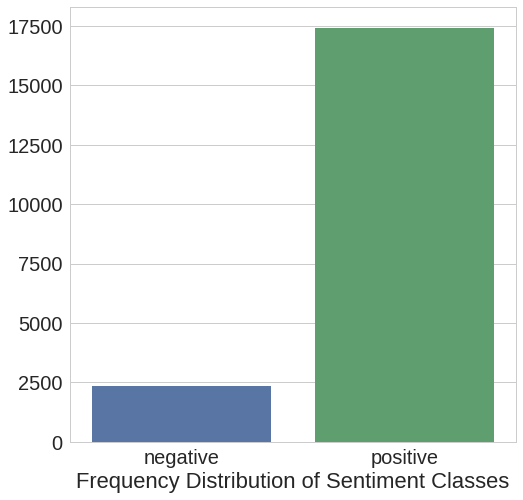

In [25]:
positive_class = int(labels[labels == 1].shape[0])
negative_class = int(labels[labels == 0].shape[0])

df = pd.DataFrame.from_dict({'positive': [positive_class], 'negative': [negative_class]})

plt.figure(figsize=(8, 8))
sns.set(font_scale=2)
sns.set_style('whitegrid')
ax = sns.barplot(data=df)
ax = ax.set_xlabel('Frequency Distribution of Sentiment Classes')

In [0]:
from keras.utils import to_categorical
labels = to_categorical(labels)

In [27]:
labels[:10]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [28]:
embeddings_index = dict()
with open('/content/gdrive/My Drive/NLP/glove.840B.300d.txt') as file:
    data = file.readlines()
    
# store <key, value> pair of FastText vectors
for line in data[1:]:
    word, vec = line.split(' ', 1)
    embeddings_index[word] = np.array([float(index) for index in vec.split()], dtype='float32')
print('Loaded {} word vectors.'.format(len(embeddings_index)))


embedding_matrix = np.zeros((vocabulary_size, max_length))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

Loaded 2196016 word vectors.


In [0]:
words = []
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        words.append(word)

In [30]:
print('{} words covered.'.format(len(words)))


13135 words covered.


In [31]:
percentage = (len(words) / vocabulary_size) * 100.00
print('{}% of {} words were covered'.format(percentage, vocabulary_size))

72.8952772073922% of 18019 words were covered


In [0]:
def train_test_split(features, labels, **kwargs):
    
    # concatenate the features and labels array
    dataset = np.c_[features, labels]

    # shuffle the dataset
    np.random.shuffle(dataset)

    # split the dataset into features, labels
    features, labels = dataset[:, 0:max_length], dataset[:, max_length:]

    # get the split size for training dataset
    split_index = int(kwargs['train_size'] * len(features))

    # split the dataset into training/validation dataset
    train_features, validation_features = features[:split_index], features[split_index:]
    train_labels, validation_labels = labels[:split_index], labels[split_index:]

    # get the split size for validation dataset
    split_index = int(kwargs['validation_size'] * len(validation_features))

    # split the validation dataset into validation/testing dataset
    validation_features, test_features = validation_features[:split_index], validation_features[split_index:]
    validation_labels, test_labels = validation_labels[:split_index], validation_labels[split_index:]

    # return the partitioned dataset
    return [train_features, train_labels], [validation_features, validation_labels], [test_features, test_labels]

In [0]:
train_dataset, validation_dataset, test_dataset = train_test_split(features=padded_features, labels=labels,
                                                                   train_size=0.60, validation_size=0.50)

In [34]:
print('Dataset size : {}'.format(padded_features.shape[0]))
print('Train dataset size : {}'.format(train_dataset[0].shape[0]))
print('Validation dataset size : {}'.format(validation_dataset[0].shape[0]))
print('Test dataset size : {}'.format(test_dataset[0].shape[0]))

Dataset size : 19805
Train dataset size : 11883
Validation dataset size : 3961
Test dataset size : 3961


In [0]:
from keras import callbacks
from keras.layers import Bidirectional
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import LSTM
from keras.models import Sequential
from sklearn.model_selection import StratifiedKFold

In [36]:
model = Sequential()
e = Embedding(vocabulary_size, max_length,
              weights=[embedding_matrix], input_length=max_length, trainable=False)
model.add(e)
model.add(Bidirectional(LSTM(256), merge_mode='sum'))
model.add(Dropout(0.50))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_dataset[0], train_dataset[1], epochs=32, batch_size=256, verbose=1,
          validation_data=(validation_dataset[0], validation_dataset[1]))

score = model.evaluate(test_dataset[0], test_dataset[1], verbose=1)

print('loss : {}, acc : {}'.format(score[0], score[1]))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 11883 samples, validate on 3961 samples
Epoch 1/32
11883/11883 [==============================] - 71s 6ms/step - loss: 0.3651 - acc: 0.8733 - val_loss: 0.3024 - val_acc: 0.8798
Epoch 2/32
11883/11883 [==============================] - 68s 6ms/step - loss: 0.2945 - acc: 0.8773 - val_loss: 0.3449 - val_acc: 0.8798
Epoch 3/32
11883/11883 [==============================] - 68s 6ms/step - loss: 0.2520 - acc: 0.8942 - val_loss: 0.2205 - val_acc: 0.9116
Epoch 4/32
11883/11883 [==============================] - 67s 6ms/step - loss: 0.2167 - acc: 0.9126 - val_loss: 0.2522 - val_acc: 0.8871
Epoch 5/32
11883/11883 [==============================] - 68s 6ms/step - loss: 0.1997 - acc: 0.9191 - val_loss: 0.1931 - val_acc: 0.9212
Epoch 6/32
11883/11883 [=======

In [0]:
import pickle
pkl_filename = "/content/gdrive/My Drive/NLP/RNN_Rating.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(model, file)

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

test_predictions = model.predict(test_dataset[0])
test_predictions = np.argmax(test_predictions, axis=1)

class_names = ['(0) Negative class', '(1) Positive class']
report = classification_report(np.argmax(test_dataset[1], axis=1), test_predictions, target_names=class_names)

In [39]:
print(report)

                    precision    recall  f1-score   support

(0) Negative class       0.77      0.58      0.66       475
(1) Positive class       0.94      0.98      0.96      3486

         micro avg       0.93      0.93      0.93      3961
         macro avg       0.86      0.78      0.81      3961
      weighted avg       0.92      0.93      0.92      3961



In [40]:
conf_matrix = confusion_matrix(np.argmax(test_dataset[1], axis=1), test_predictions)
print(conf_matrix)

[[ 275  200]
 [  84 3402]]


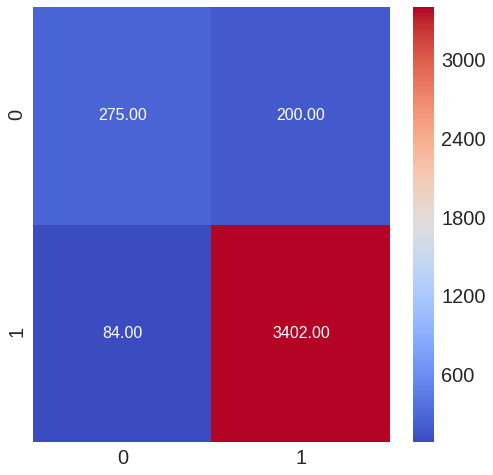

In [41]:
plt.figure(figsize=(8, 8))
plt.savefig('conf_matrix_sentiment.png', format='png', dpi=300)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size': 16}, cmap='coolwarm', fmt='.2f')

In [42]:
from sklearn.metrics import roc_auc_score

roc = roc_auc_score(y_score=test_predictions, y_true=np.argmax(test_dataset[1], 1))
print(roc)

0.7774254914394421


In [43]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(np.argmax(test_dataset[1], 1), test_predictions)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.7774254914394421


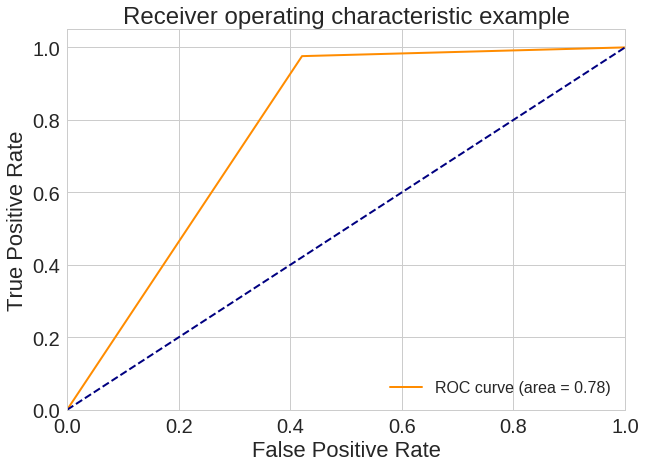

In [44]:
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, lw=2, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right', fontsize=16)
plt.savefig('roc.png', format='png', dpi=300)
plt.show()